In [46]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [47]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pruning.model import Model
from pruning.data import MNISTLoader
from pruning.train import Trainer

tf.enable_eager_execution()

In [48]:
with open("results.pickle", 'rb') as f:
    results = pickle.load(f)

In [49]:
k_vals = [0.0, .25, .50, .60, .70, .80, .90, .95, .97, .99]

In [50]:
# preview accuracies against % pruned
# format: (k, (weight_acc, unit_acc))
list(zip(k_vals, zip(results["weight_accs"], results["unit_accs"])))

[(0.0, (0.9506789, 0.9506789)),
 (0.25, (0.9504792, 0.8591254)),
 (0.5, (0.9504792, 0.8591254)),
 (0.6, (0.94209266, 0.8573283)),
 (0.7, (0.9318091, 0.85722846)),
 (0.8, (0.8401558, 0.7556909)),
 (0.9, (0.7822484, 0.4368011)),
 (0.95, (0.70477235, 0.18360624)),
 (0.97, (0.454373, 0.15864617)),
 (0.99, (0.22603834, 0.175619))]

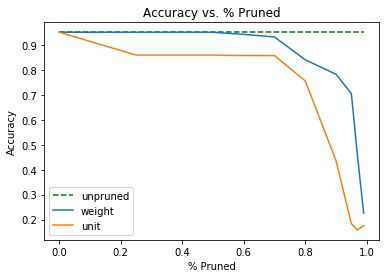

In [51]:
# display accuracies on val set
plt.title("Accuracy vs. % Pruned")
plt.ylabel("Accuracy")
plt.xlabel("% Pruned")
plt.plot(k_vals, [results["val_acc"] for i in range(len(results["weight_accs"]))], "--g")
plt.plot(k_vals, results["weight_accs"])
plt.plot(k_vals, results["unit_accs"])
plt.legend(["unpruned", "weight", "unit"], loc='lower left')

plt.show()

### Remarks

As we can see from the numerical and visual displays (cells 5 and 6, respectively) of our networks performance degradation, it seems as though only a relatively small subset (somewhere in the range of 25%-50%) of our networks weights are doing the bulk of its work, suggesting massive overparametrization in the network (surprise).

Pruning on the weight level outperforms pruning on the unit level wrt to model accuracy, as weight-level pruning begets a more fine-grained pruning approach, despite pruning the exact same number of weights.

In terms of optimizing on performance, I noticed that TensorFlow supports a variety of sparse matrix operations, which I imagine would speed up training/inference on a pruned network.